In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# You can safely ignore the warning:
#  Please use the pandas.tseries module instead. from pandas.core import datetools
import statsmodels.api as sm

<AxesSubplot:>

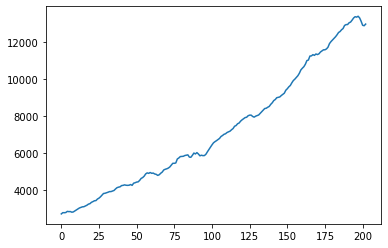

In [5]:
df = sm.datasets.macrodata.load_pandas().data
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2008Q3'))
df.head()
df['realgdp'].plot()

<AxesSubplot:>

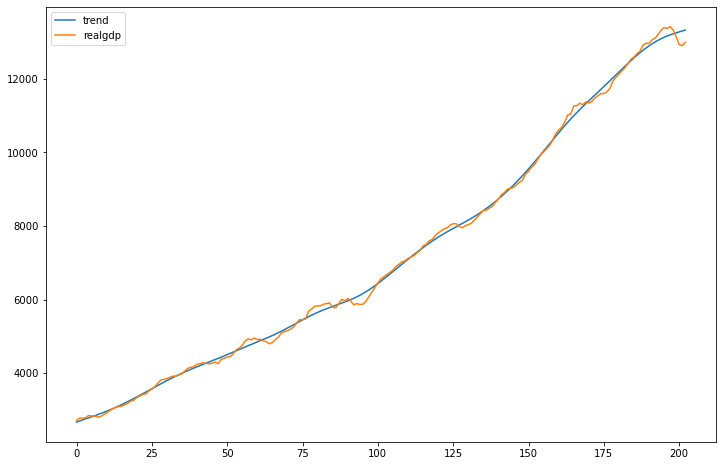

In [15]:
cyle, trend = sm.tsa.filters.hpfilter(df['realgdp'])
df['trend'] = trend
df[['trend','realgdp']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Month'>

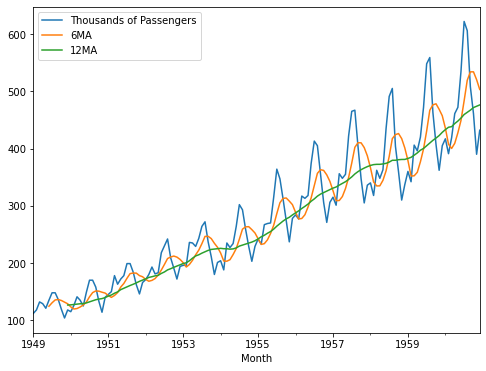

In [28]:
#EWMA
airline = pd.read_csv('airline_passengers.csv', index_col='Month')
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline['6MA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12MA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot(figsize=(8, 6))

<AxesSubplot:xlabel='Month'>

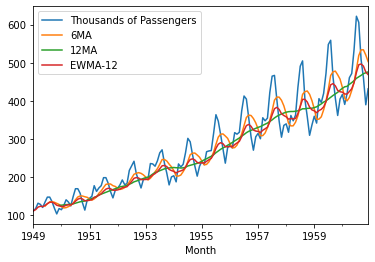

In [32]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline.plot()